In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

I picked the amazon_cells_labelled.txt file and I connected the file to my Jupyter Notebook.

In [2]:
data_path = ("amazon_cells_labelled.txt")
amazon_raw = pd.read_csv(data_path, delimiter= '\t', header = None)
amazon_raw.columns = ['spam', 'message']

I looked through the messages in the file and I noticed that certain words were repeated throughout the file. Due to this, 
I picked seven keywords to place in the cell below.

In [3]:
keywords = ['excellent', 'happy', 'pleased', 'good', 'great', 'best', 'charm']

for key in keywords:
    amazon_raw[str(key)] = amazon_raw.spam.str.contains(' ' + str(key) + ' ', case = False)

I plotted the graph of the keywords and obtained the following results.

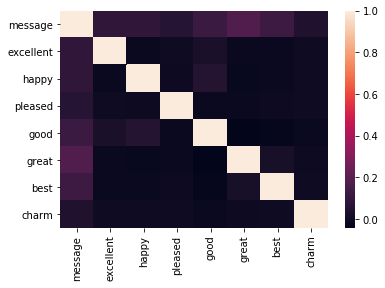

In [4]:
sns.heatmap(amazon_raw.corr())

Finally, I found the number of mislabeled points that the data had.

In [5]:
data = amazon_raw[keywords]
target = amazon_raw['spam']

In [6]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 994
